# DATA 550 - Lab 1 - Visualizing world health data

In this lab we will be using both R and Python,
and for each question you will develop an answer both in `ggplot` and in `Altair`.
Although the `%%R` cell magic makes it convenient for us to do this in the same notebook,
I would still recommend that you use a separate Jupyter Notebook with a dedicated R kernel
or RStudio to develop your R code.
The reasons for this are that autocompletion works better there
and the error messages are easier to understand.
Once you have developed the code for a question
you can paste it into the corresponding R cell here
and make sure it runs and shows up in the exported HTML.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Create a GitHub Repo for your group. 
      <ul>
          <li>Keep this organized, i.e. with a separate clearly marked folder for each assignment.</li>
    </ul>
  </li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab.</li>

  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2025/DATA_550_labX_groupY.</li>
    </ul>
  </li>
  <li>Upload a <code>.html</code> version of your assignment to Canvas.
    <ul>
      <li> Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`</li>
      <li> Convert your notebook to .html format using `File -> Save and Export Notebook As -> HTML`</li>
      <li> Submit and double check that your have submitted the correct file to Canvas </li>
    </ul>
  </li>
</ul>
</div>

https://github.com/Jaaanet/DATA_550_lab1_group2

In [1]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('html')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('vegafusion')

# Load the R cell magic
%load_ext rpy2.ipython

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


# 1. Get motivated!

You have already worked with the Gapminder world health data set in the previous block
and we will revisit an updated version of it in this lab.
The Gapminder foundation strives to educate people about the public health status
in countries all around the world
and fight devastating misconceptions that hinder world development.
This information is important both for our capacity to make considerate choices as individuals,
and from an industry perspective in understanding where markets are emerging.
In their research,
Gapminder has discovered that most people don't really know what the world looks like today.
Do you?
[Take this 7-8 min quiz to find out](https://forms.gapminder.org/s3/test-2018).

This quiz is not easy,
so don't worry if you get a low score.
I took this quiz for the first time a few years back and I didn't do too well myself =)
It is primarily meant to spark your curiosity to learn more about this lab's data set!
When you are done,
[please submit your score in this Google form](https://docs.google.com/forms/d/e/1FAIpQLSc2B0wlF-QWqAeJnHbu534WT-Twhpetk_4uUMM3LZvV0wv0mg/viewform?usp=sf_link).
This is anonymous,
I just want to explore if we can use the the distribution of scores
for something interesting in class or future labs.

<div class="alert alert-info" style="color:black">

### Question 1.1
rubric={reasoning:1,writing:1}

<p>To answer the first lab question
<a href=https://www.youtube.com/watch?v=usdJgEwMinM>watch this 20 min video of Hans Rosling</a>
a public health professor at Karolinska Institute
who founded Gapminder together with his son and his son's wife.
Although the video is almost 15 years old,
it is a formidable demonstration on how to present data in a way that engages your audience
while conveying a strong, important message.
(The original clip has over 3 million views,
but I linked you one of better video quality).</p>

<p>Briefly describe (&lt;=90 words)
what you think is the most important message conveyed in the video
and which data visualization you think was the most effective
in getting this message across to the viewers.</p>
    
</div>

Visualizing data by yourself is an extremely challenging task, and incorrect visualization can cause many problems in personal life or in society. The visualization that most stood out to me was the one about life expectancy vs birth rates, as it showed that much of the world is now in the same situation as the west.

# 2. The Gapminder bubble chart

The "bubble chart" have become quite famous from their appearance in the Gapminder talks,
and are widely used in other areas as well.
Let's start by recreating a simple version of this chart ourselves!

There will be some data wrangling involved in this lab,
and since 531 is primarily about visualization and this is the first lab,
I will give you some hints for most data wrangling parts of this lab.
Often I will link documentation or StackOverflow,
so that you get practice finding information on these sources,
and sometimes you will need to search them yourself if I haven't included a link.

To make this more interesting,
I have compiled a more recent version of the Gapminder dataset,
which contains values up until 2018 for most of the features.
We will not use all the columns in the data set,
but here is a description of what they contain
that you can refer back to throughout the lab.

| Column                | Description                                                                                  |
|-----------------------|----------------------------------------------------------------------------------------------|
| country               | Country name                                                                                 |
| year                  | Year of observation                                                                          |
| population            | Population in the country at each year                                                       |
| region                | Continent the country belongs to                                                             |
| sub_region            | Sub-region the country belongs to                                                            |
| income_group          | Income group [as specified by the world bank in 2018]                                                |
| life_expectancy       | The mean number of years a newborn would <br>live if mortality patterns remained constant    |
| income                | GDP per capita (in USD) <em>adjusted <br>for differences in purchasing power</em>            |
| children_per_woman    | Average number of children born per woman                                                    |
| child_mortality       | Deaths of children under 5 years <break>of age per 1000 live births                          |
| pop_density           | Average number of people per km<sup>2</sup>                                                  |
| co2_per_capita        | CO2 emissions from fossil fuels (tonnes per capita)                                          |
| years_in_school_men   | Mean number of years in primary, secondary,<br>and tertiary school for 25-36 years old men   |
| years_in_school_women | Mean number of years in primary, secondary,<br>and tertiary school for 25-36 years old women |

[as specified by the world bank in 2018]: https://datahelpdesk.worldbank.org/knowledgebase/articles/378833-how-are-the-income-group-thresholds-determined

<div class="alert alert-info" style="color:black">

### Question 2.1
rubric={accuracy:1,quality:1,viz:2}

<h4>Python</h4>
<ol type="1">
<li>I have uploaded the <a href=https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv> 2018 Gapminder data at this URL.</a> Use <code>read_csv</code> from <code>pandas</code> to load the data directly from the URL and assign it a suitable variable name. Set the <code>parse_dates</code> parameter to <code>['year']</code> to ensure that Altair recognizes this columns as time data.</li>
<li>Now let’s create a similar bubble chart to what you saw in the video:
<ul>
<li>Filter the dataframe to only keep observations from a single year, 1962. You can create a new data frame variable or perform the filtering directly as you pass the data to Altair. Dates can be matched as strings when filtering.</li>
<li>Use a circle mark to recreate the appearance of the plot in the video.</li>
<li>Encode the proper variables so that children per woman is on the x-axis, life expectancy on the y-axis, and so that the circles’ color corresponds to their region, and the size reflects the population.</li>
</ul></li>
</ol>
<p> Don't worry about getting axis labels and sizes to be exactly like in the video,
we will return to this code later in the lab to customize it.</p>
</div>

In [2]:
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd

url = 'https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv'
data2018 = pd.read_csv(url, parse_dates=['year'])

#data2018.head()

data1962 = data2018[data2018['year'].astype(str).str[:4] == '1962']

#data1962.head()

chart1962 = alt.Chart(data1962).mark_circle().encode(
    x='children_per_woman',
    y='life_expectancy',
    color='region',
    size='population'
)

chart1962.display()



alt.Chart(...)

<div class="alert alert-success" style="color:black">

### Question 2.2
rubric={accuracy:1,quality:1,viz:2}

<h4>
R
</h4>
<ol type="1">
<li>I have uploaded the <a href=https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv> 2018 Gapminder data at this URL and assign it a suitable variable name.</a> Use <code>read_csv</code> from <code>readr</code> to load the data directly from the URL.</li>
<li>Now let’s create a similar bubble chart to what you saw in the video:
<ul>
<li>Filter the dataframe to only keep observations from a single year, 1962. You can create a new data frame variable or (preferably) perform the filtering directly and pipe it to ggplot. Dates can be matched as strings when filtering.</li>
<li>Use a point geom to recreate the appearance of the plot in the video.</li>
<li>Encode the proper variables so that children per woman is on the x-axis, life expectancy on the y-axis, and so that the circles’ color corresponds to their region, and the size reflects the population.</li>
</ul></li>
</ol>
<p> Don't worry about getting axis labels and sizes to be exactly like in the video,
we will return to this code later in the lab to customize it.</p>
</div>

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 38982 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): country, region, sub_region, income_group
dbl (10): year, population, life_expectancy, income, children_per_woman, chi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


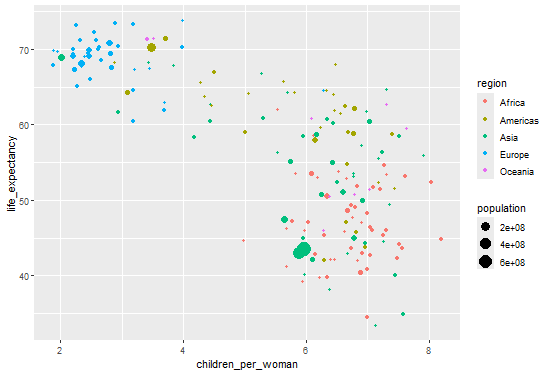

In [3]:
%%R -w 550 -h 375
# YOUR R ANSWER GOES HERE
library(tidyverse)

url <- "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
rdata2018 <- read_csv(url)

#head(rdata2018)

rdata1962 <- rdata2018[rdata2018$year == '1962',]

#head(rdata1962)

ggplot(rdata1962, aes(x = children_per_woman, y = life_expectancy, color = region, size = population)) + geom_point()



# 3. Education balance

A common misconception is that women around the world go to school many years less than men. Let’s find out what the data actually says about this.

<div class="alert alert-info" style="color:black">

### Question 3.1
rubric={accuracy:2,quality:1,viz:2}

<h4>
Python
</h4>
<ol type="1">
<li>Compute a new column in your dataframe that represents the ratio between the number of years in school for women and men (calculate it so that the value 1 means as many years for both, and 0.5 means half as many for women compared to men).</li>
<li>Filter the dataframe to only contain value from 1970 - 2015, since those are the years where the education data has been recorded. Again you can either create a new variable or perform the filtering as you pass the data to the plotting function.</li>
<li>Create a line plot showing how the ratio of women’s of men’s years in school has changed over time. Group the data by income group and plot the mean for each group.</li>
<li>Use layering to add a square mark for every data point in your line plot (so one per yearly mean in each group).</li>
</ol>

</div>

In [4]:
# YOUR PYTHON ANSWER GOES HERE
dataratio = data2018[(data2018['year'].astype(str).str[:4].astype(int) >= 1970) & (data2018['year'].astype(str).str[:4].astype(int) <= 2015)].copy()

#dataratio.head()

dataratio['yearratio'] = dataratio['years_in_school_women']/dataratio['years_in_school_men']

#dataratio.head()

dataincome = dataratio.groupby(['year', 'income_group'], as_index=False)['yearratio'].mean()

chartlineratio = alt.Chart(dataincome).mark_line().encode(
    x='year',
    y='yearratio',
    color='income_group'
)

chartsquareratio = alt.Chart(dataincome).mark_square().encode(
    x='year',
    y='yearratio',
    color='income_group')

chartlineratio + chartsquareratio


alt.LayerChart(...)

<div class="alert alert-success" style="color:black">

### Question 3.2
rubric={accuracy:2,quality:1,viz:2}

<h4>
R
</h4>
<ol type="1">
<li>Compute a new column in your dataframe that represents the ratio between the number of years in school for women and men (calculate it so that the value 1 means as many years for both, and 0.5 means half as many for women compared to men).</li>
<li>Filter the dataframe to only contain value from 1970 - 2015, since those are the years where the education data has been recorded. Again you can either create a new variable or perform the filtering as you pass the data to the plotting function.</li>
<li>Create a line plot showing how the ratio of women’s of men’s years in school has changed over time. Group the data by income group and plot the mean for each group.</li>
<li>Use layering to add a square mark for every data point in your line plot (so one per yearly mean in each group). Look into the `shape` parameter for `geom_point`.</li>
</ol>
</div>

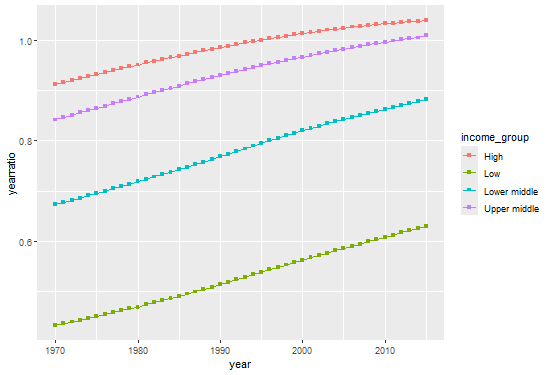

In [5]:
%%R -w 550 -h 375
# YOUR R ANSWER GOES HERE

rdataratio <- rdata2018[rdata2018$year >= 1970 & rdata2018$year <= 2015,]

#head(rdataratio)

rdataratio$yearratio <- rdataratio$years_in_school_women/rdataratio$years_in_school_men

#head(rdataratio)

rdataincome <- rdataratio %>% group_by(year, income_group) %>%
    summarise(yearratio = mean(yearratio, na.rm = TRUE), .groups = "drop")
    
ggplot(rdataincome, aes(x = year, y = yearratio, color = income_group)) + geom_line() + geom_point(shape = 15)

<div class="alert alert-warning" style="color:black">

### Question 3.3 (Optional)
rubric={accuracy:1}

<h4>
Python
</h4>
Add <a href=https://altair-viz.github.io/gallery/line_with_ci.html> a confidence interval band</a>
to your line + square plot by assigning the plot in the previous question to a variable name
and then using layering to add the band.
The default in the link above is a 95% bootstrapped confidence interval.
</div>

In [6]:
# YOUR PYTHON ANSWER GOES HERE

chartbands = alt.Chart(dataratio).mark_errorband(extent='ci').encode(
    x='year',
    y='yearratio',
    color='income_group'
)

chartlineratio + chartsquareratio + chartbands

alt.LayerChart(...)

<div class="alert alert-warning" style="color:black">

### Question 3.4 (Optional)
rubric={accuracy:1}

<h4>
R
</h4>
Add <a href=https://stackoverflow.com/a/32671983/2166823> a confidence interval band</a>
to your line + square plot by assigning the plot in the previous question to a variable name
and then using layering to add the band. Although the answer in that link uses <code>stat_summary(geom = 'ribbon'...)</code>,
you can use <code>geom_ribbon(stat = 'summary'...)</code> as we did in the lecture.
Also note that you need the <code>Hmisc</code> package installed to use <a href=https://ggplot2.tidyverse.org/reference/hmisc.html> the mean_cl_boot function</a>,
which you should use here to create a 95% bootstrapped confidence interval,
just as in the Python plot above.
    
</div>

R callback write-console: In addition:   
R callback write-console: Warning message:
  
R callback write-console: Removed 184 rows containing missing values or values outside the scale range
(`geom_ribbon()`). 
  


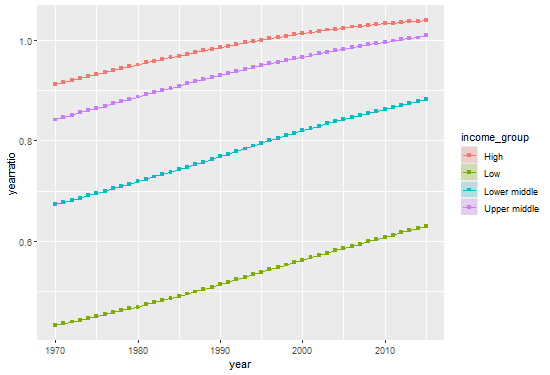

In [27]:
%%R -w 550 -h 375
# YOUR R ANSWER GOES HERE
library(Hmisc)

#rdataincome_clean <- rdataincome |> filter(!is.na(yearratio))

ggplot(rdataincome, aes(x = year, y = yearratio, group = income_group, color = income_group)) + geom_ribbon(
    stat = "summary", 
    fun.data = mean_cl_normal, #fun.data = ~ mean_se(.x) * 1.96,
    aes(fill = income_group),
    alpha = 0.25,
    color = NA
) + geom_line() + geom_point(shape = 15)


# 4. Family planning

Another common misconception is that saving the lives of children in low income countries
will lead to overpopulation.
Rather,
lower child mortality is actually correlated with smaller family sizes.
As more children survive,
parents feel more secure with a smaller family size.
Let's have a look in the data to see how this relationship has evolved over time.

In the plots we are going to make,
it is important to note that it is not possible to tell causation,
just correlation.
However,
in the [Gapminder](https://www.gapminder.org/videos/) video library
there are a few videos on this topic
(including [this](https://www.gapminder.org/answers/will-saving-poor-children-lead-to-overpopulation/)
and [this](https://www.gapminder.org/videos/population-growth-explained-with-ikea-boxes/) one),
discussing how reducing poverty can help slow down population growth
through decreased family sizes.
Current estimates suggest that the word population
will stabilize around 11 billion people
and the average number of children per woman
will be close to two worldwide in year 2100.

<div class="alert alert-info" style="color:black">

### Question 4.1
rubric={accuracy:1,viz:2,reasoning:1}

<h4>
Python
</h4>
<ol type="1">
<li>Filter the data to include only the years 1918, 1938, 1958, 1978, 1998, and 2018. To do this, you need to write out the full date strings, <code>'1918-01-01'</code> etc, or use <code>pd.to_datetime</code> with <code>format=%Y</code> on a list of the year integers only, up to you which one.</li>
<li>Use filled circles to make a scatter plot with children per women on the x-axis, child mortality on the y-axis, and the circles colored by the income group.</li>
<li>Facet your data into six subplots, one for each year laid out in 3 columns and 2 rows. To avoid taking too much space, set the width and height of the plots to suitable numbers.</li>
<li>Briefly describe your interpretation of the data. Does it support what was written in the introduction to this section of the lab? Why / why not?</li>
</ol>
</div>

In [8]:
# YOUR PYTHON ANSWER GOES HERE
datafamily = data2018[data2018['year'].astype(str).str[:4].isin(['1918','1938','1958','1978','1998','2018'])].copy()

#datafamily.head()

chartscatter = alt.Chart(datafamily).mark_circle().encode(
    x='children_per_woman',
    y='child_mortality',
    color='income_group').properties(
    width=200,
    height=200).facet(
    facet=alt.Facet("year"),
    columns=3
)

chartscatter

alt.FacetChart(...)

YOUR ANSWER TO 4 GOES HERE

<div class="alert alert-success" style="color:black">

### Question 4.2
rubric={accuracy:1,viz:2,reasoning:1}

<h4>
R
</h4>
<ol type="1">
<li>Filter the data to include only the years 1918, 1938, 1958, 1978, 1998, and 2018.</li>
<li>Use <a href=https://stackoverflow.com/questions/15726907/ggplot-scatterplot-points-with-no-fill> hollow circles</a> to make a scatter plot with children per women on the x-axis, child mortality on the y-axis, and the circles colored by the income group.</li>
<li>Facet your data into six subplots, one for each year laid out in 3 columns and 2 rows.</li>
<li>I have already adjusted the ggplot figure size in this cell, but how could you do it if you were inside R Studio in either an R Markdown document or a script?</li>
</ol>
</div>

R callback write-console: In addition:   
R callback write-console: Warning message:
  
R callback write-console: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 
  


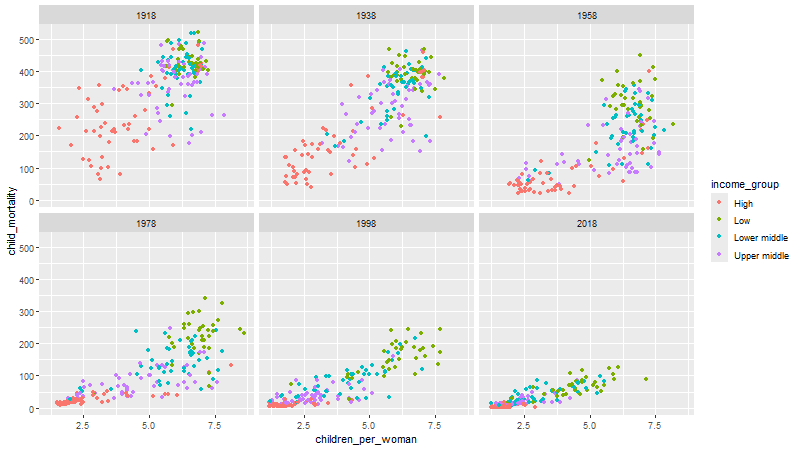

In [9]:
%%R -w 800 -h 450
# YOUR R ANSWER GOES HERE

rdatafamily <- rdata2018[rdata2018$year %in% c(1918, 1938, 1958, 1978, 1998, 2018),]

ggplot(rdatafamily, aes(x = children_per_woman, y = child_mortality, color = income_group)) + geom_point() + facet_wrap(~ year, ncol = 3)

YOUR ANSWER TO 4 GOES HERE

# 5. Carbon dioxide emissions

CO2 emissions are often talked about in it's relation to climate change.
Let's explore the data to see which countries emits the most CO2 per capita
and which regions has emitted the most in total over time.

<div class="alert alert-info" style="color:black">

### Question 5.1
rubric={accuracy:1,quality:1,viz:2}

<h4>
Python
</h4>
<ol type="1">
<li>Filter the data to include only the most recent year when <code>'co2_per_capita'</code> was measured (it is up to you how you find out which year this is).</li>
<li>Use the data frame <code>nlargest</code> method to select the top 40 countries in CO2 production per capita for that year.</li>
<li>Since we have only one value per country per year, let’s create a bar chart to visualize it. Encode the CO2 per capita as on the x-axis, the country on the y-axis, and the region as the color.</li>
<li>Sort your bar chart so that the highest CO2 per capita is the closest to the x-axis (the bottom of the chart). <a href="https://altair-viz.github.io/gallery/bar_chart_sorted.html">Here is an example of how to sort in Altair</a>.</li>
</ol>
</div>

In [10]:
# YOUR PYTHON ANSWER GOES HERE

<div class="alert alert-success" style="color:black">

### Question 5.2
rubric={accuracy:1,quality:1,viz:2}

<h4>
R
</h4>
<ol type="1">
<li>Filter the data to include only the most recent year when <code>'co2_per_capita'</code> was measured (it is up to you how you find out which year this is).</li>
<li>Use the <code>slice_max</code> function from dplyr to select the top 40 countries in CO2 production per capita for that year.</li>
<li>Since we have only one value per country per year, let’s create a bar chart to visualize it. Set the aesthetics so that the CO2 per capita is on the x-axis, the country is on the y-axis, and the region is the color (you can use <code>fill</code> instead of <code>color</code> to get rid of the black outlines).</li>
<li>Sort your bar chart so that the highest CO2 per capita is the closest to the x-axis (the bottom of the chart). <a href="https://stackoverflow.com/questions/25664007/reorder-bars-in-geom-bar-ggplot2-by-value">Here is an example of how to sort in ggplot using the base R function <code>reorder</code></a>.</li>
</ol>

<p>See <a href=https://stackoverflow.com/a/59009108/2166823> this SO answer</a> if you are having issues creating the bar chart.</p>

</div>

In [11]:
%%R -w 500 -h 800
# YOUR R ANSWER GOES HERE

NULL


<div class="alert alert-info" style="color:black">

### Question 5.3
rubric={accuracy:1,quality:1,viz:2}

<h4>
Python
</h4>
<ol type="1">
<li>in addition to the co2 per capita, the total population also matter for a country’s overall co2 emissions. compute a new column in your data set called <code>'co2_total'</code> which contains the total co2 emissions per observation.</li>
<li>plot this new column over time in an area chart, but instead of plotting one area for each country, plot one for each region which represents the sum of all countries co2 emissions in that region.</li>
</ol>
</div>

In [12]:
# YOUR PYTHON ANSWER GOES HERE

<div class="alert alert-success" style="color:black">

### Question 5.4
rubric={accuracy:1,quality:1,viz:2}

<h4>
R
</h4>
<ol type="1">
<li>in addition to the co2 per capita, the total population also matter for a country’s overall co2 emissions. compute a new column in your data set called <code>'co2_total'</code> which contains the total co2 emissions per observation.</li>
<li>plot this new column over time in an area chart, but instead of plotting one area for each country, plot one for each region which represents the sum of all countries co2 emissions in that region. In order for the areas to stack, you will have to set `position='stack'`.</li>
</ol>
    
<p><a href=https://stackoverflow.com/a/44226841/2166823> See this link if you want to read some background info on on when to use `geom_*` and when to use `stat_summary()`</a></p>
    
</div>

In [13]:
%%R -w 550 -h 375
# YOUR R ANSWER GOES HERE

NULL


# 6. Income distribution

In his talk back in 2003, Rosling showed a projection of how the world income distribution would look like in 2015. Let’s eyeball if the suggested trend was accurate.

<div class="alert alert-warning" style="color:black">

### Question 6.1 (Optional)
rubric={accuracy:1,viz:1}

<h4>Python</h4>
<ol type="1">
<li>Wrangle your data to include the years 1979, 1991, 2003 and 2015.</li>
<li>Create a histogram (binned bar chart) of the income distribution with an appropriate number of bins.</li>
<li>Facet by year and make the plots smaller so that they fit in a single row.</li>
<li>It is a little hard to tell if the data is exactly the same as the prediction since we are not using a log scale and a histogram instead of a density plot (we’ll learn about these things later). But in general, briefly explain whether you think the trend is the same or not?</li>
</ol>
</div>

In [14]:
# YOUR PYTHON ANSWER GOES HERE

<div class="alert alert-warning" style="color:black">

### Question 6.2 (Optional)
rubric={accuracy:1,viz:1}

<h4>R</h4>
<ol type="1">
<li>Wrangle your data to include the years 1979, 1991, 2003 and 2015.</li>
<li>Create a histogram (binned bar chart) of the income distribution with an appropriate number of bins.</li>
<li>Facet by year and make the plots smaller so that they fit in a single row.</li>
<li>It is a little hard to tell if the data is exactly the same as the prediction since we are not using a log scale and a histogram instead of a density plot (we’ll learn about these things later). But in general, briefly explain whether you think the trend is the same or not?</li>
</ol>
</div>

In [15]:
%%R -w 1000 -h 250
# YOUR R ANSWER GOES HERE

NULL


# 7. Chart beautification


Let's make our charts from question 2 look more like the Gapminder bubble chart! Beautifying charts can take a long time, but it is also satisfying when you end up with a really nice looking chart in the end. We will learn more about how to create charts for communication later, but these parameters are usually enough to create basic communication charts and to help you in your data exploration.

<div class="alert alert-info" style="color:black">

### Question 7.1
rubric={accuracy:2,quality:1,viz:1}

<h4>
Python
</h4>
<ol type="1">
<li>Copy in your code from question 2.1 and confirm that your scatter plot is generated properly so that you didn't miss to copy anything.</li>
<li>Add a title of your choice to the chart.</li>
<li>Set the x-axis and y-axis scale so that they don’t include zero and are zoomed in to the extent of the data instead.</li>
<li>Set proper titles for the axis and the legends, which include spaces instead of underscores and are capitalized.</li>
<li>Some of the dots are really hard to see because they are so small and it is a bit difficult to distinguish the changes in size as well. Let’s make everything bigger and emphasize the size difference by using the <a href="https://altair-viz.github.io/gallery/airport_connections.html">range argument to <code>alt.Scale</code></a> (there is a lot of other things going on in this example, so just focus on how they specify <code>size</code>).</li>
<li>Enlarge the axis title font by finding and setting the <a href="https://altair-viz.github.io/user_guide/configuration.html?highlight=titlefont#axis-configuration">right parameter of <code>.configure_axis</code></a></li>
</ol>

</div>

In [38]:
# YOUR PYTHON ANSWER GOES HERE
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd

url = 'https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv'
data2018 = pd.read_csv(url, parse_dates=['year'])

#data2018.head()

data1962 = data2018[data2018['year'].astype(str).str[:4] == '1962']

#data1962.head()

chart1962 = alt.Chart(data1962).mark_circle().encode(
    x=alt.X(
        "children_per_woman",
        title="Children Per Woman",
        scale=alt.Scale(zero=False),
    ),
    y=alt.Y(
        "life_expectancy",
        title="Life Expectancy",
        scale=alt.Scale(zero=False),
    ),
    color='region',
    size=alt.Size(
        "population",
        title="Population",
        scale=alt.Scale(range=[20, 2000]),
    ),
).properties(title="Children Per Woman vs Life Expectancy").configure_axis(titleFontSize=20, labelFontSize=10)

chart1962

alt.Chart(...)

<div class="alert alert-success" style="color:black">

### Question 7.2
rubric={accuracy:2,quality:1,viz:1}

<h4>
R
</h4>
 
<ol type="1">
<li>Copy in your code from question 2.2 and confirm that your scatter plot is generated properly so that you didn't miss to copy anything.</li>
<li>Add a title of your choice to the chart.</li>
<li>Set the <a href=https://ggplot2.tidyverse.org/reference/geom_point.html>transparency of the points</a> to an appropriate value, so that they are not completely obfuscating each other.</li>
<li>Set proper titles for the axis and the legends, which include spaces instead of underscores and are capitalized.</li>
<li>Change to a black and white theme.</li>
<li>Enlarge the text for all fonts (<a href=https://stackoverflow.com/a/34528522/2166823>See here if you need guidance)</a>.</li>
<li>Some of the dots are really hard to see because they are so small and it is a bit difficult to distinguish the changes in size as well. Let’s make everything bigger and emphasize the size difference by using the <a href="https://ggplot2.tidyverse.org/reference/scale_size.html"> <code>scale_size</code> function.</a></li>
</ol>
    
</div>

Rows: 38982 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): country, region, sub_region, income_group
dbl (10): year, population, life_expectancy, income, children_per_woman, chi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


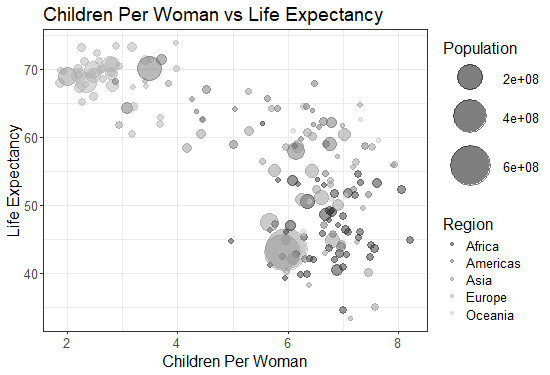

In [50]:
%%R -w 550 -h 375
# YOUR R ANSWER GOES HERE

url <- "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
rdata2018 <- read_csv(url)

#head(rdata2018)

rdata1962 <- rdata2018[rdata2018$year == '1962',]

#head(rdata1962)

ggplot(rdata1962, aes(x = children_per_woman, y = life_expectancy, color = region, size = population)) + 
geom_point(alpha = 0.5) +
labs(
    title = "Children Per Woman vs Life Expectancy",
    x = "Children Per Woman",
    y = "Life Expectancy",
    color = "Region",
    size = "Population"
) +
scale_size(range = c(2, 20)) +
theme_bw() +
scale_color_grey() +
theme(text=element_text(size=16))